In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('credit_risk_dataset.csv')
print(df.head())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [105]:
mean = df['person_age'].mean()
std = df['person_age'].std()
print (mean)
print(std)

27.73459992019889
6.348078419225359


In [106]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df[(df['person_age'] < limite_inferior) | (df['person_age'] > limite_superior)]


In [107]:
df_filtrado = df[(df['person_age'] >= limite_inferior) & (df['person_age'] <= limite_superior)]
print(df[(df['person_age'] >= limite_inferior) & (df['person_age'] <= limite_superior)])

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32294          36          92000              MORTGAGE               18.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [108]:
mean = df_filtrado['person_emp_length'].mean()
std = df_filtrado['person_emp_length'].std()
print (mean)
print(std)

4.769574153767102
4.0846916802918996


In [109]:
limite_inferior = 0
limite_superior = mean + 3 * std

outliers = df_filtrado[(df['person_emp_length'] < limite_inferior) | (df_filtrado['person_emp_length'] > limite_superior)]
print(outliers)


       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
210            21         192000              MORTGAGE              123.0   
17834          34         948000              MORTGAGE               18.0   
17877          34         334000                   OWN               18.0   
17888          34          61200                  RENT               18.0   
...           ...            ...                   ...                ...   
32272          40          43000              MORTGAGE               18.0   
32280          36          53800              MORTGAGE               20.0   
32286          36          48686                  RENT               21.0   
32288          38          99996                   OWN               22.0   
32294          36          92000              MORTGAGE               18.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

/tmp/ipykernel_7615/2001108053.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df_filtrado[(df['person_emp_length'] < limite_inferior) | (df_filtrado['person_emp_length'] > limite_superior)]


In [110]:
df_filtrado = df_filtrado[(df['person_emp_length'] >= limite_inferior) & (df_filtrado['person_emp_length'] <= limite_superior)]
print(df_filtrado)

       person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32291          42         600000                 OTHER                2.0   
32292          38         200000              MORTGAGE                0.0   
32293          38         110000              MORTGAGE                5.0   
32295          42         101000              MORTGAGE                6.0   
32296          40          52000                  RENT                2.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

/tmp/ipykernel_7615/3917408275.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado = df_filtrado[(df['person_emp_length'] >= limite_inferior) & (df_filtrado['person_emp_length'] <= limite_superior)]


<Axes: >

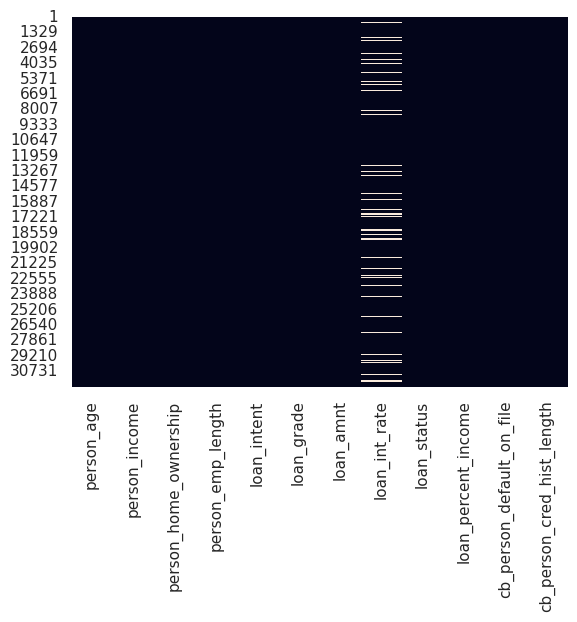

In [111]:
sns.heatmap(df_filtrado.isnull(), cbar=False)

In [112]:
def verificar_nulos_por_columna():
  for column in df_filtrado.columns:
    print(f'Columna: {column}')
    print(f'Cantidad de nulos: {df_filtrado[column].isnull().sum()}')
    print(f'% de nulos: {df_filtrado[column].isnull().sum() / len(df_filtrado[column]) * 100}%')
    print()

verificar_nulos_por_columna()

Columna: person_age
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_home_ownership
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_emp_length
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_intent
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_grade
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_amnt
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_int_rate
Cantidad de nulos: 2955
% de nulos: 9.57550226830849%

Columna: loan_status
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_percent_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_default_on_file
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_cred_hist_length
Cantidad de nulos: 0
% de nulos: 0.0%



In [113]:
# Corrijo los nulos de person_emp_length usando interpolación lineal
df_filtrado['person_emp_length'] = df_filtrado['person_emp_length'].interpolate()

# Corrijo los nulos de loan_int_rate usando interpolación lineal
df_filtrado['loan_int_rate'] = df_filtrado['loan_int_rate'].interpolate()

verificar_nulos_por_columna()


Columna: person_age
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_home_ownership
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: person_emp_length
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_intent
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_grade
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_amnt
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_int_rate
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_status
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: loan_percent_income
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_default_on_file
Cantidad de nulos: 0
% de nulos: 0.0%

Columna: cb_person_cred_hist_length
Cantidad de nulos: 0
% de nulos: 0.0%



<Axes: >

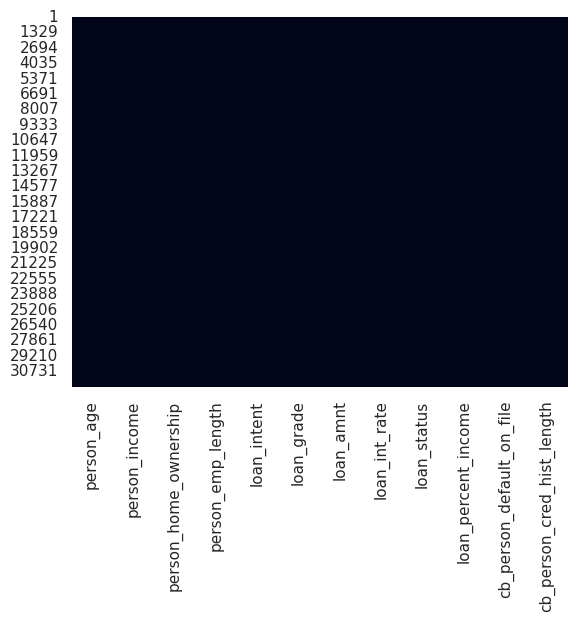

In [114]:
sns.heatmap(df_filtrado.isnull(), cbar=False)

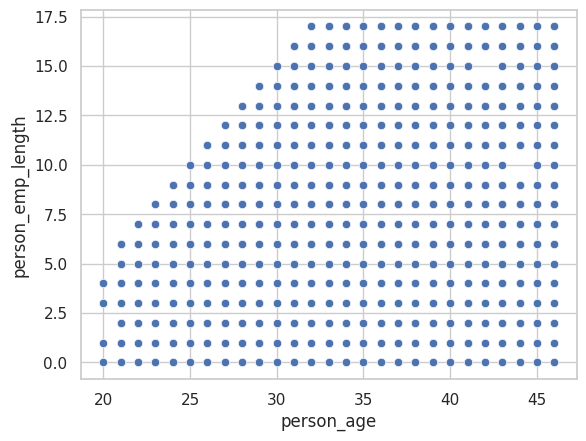

In [115]:

sns.scatterplot(x=df_filtrado['person_age'], y=df_filtrado['person_emp_length'], data=df_filtrado)
plt.show()

<Axes: xlabel='person_age', ylabel='person_income'>

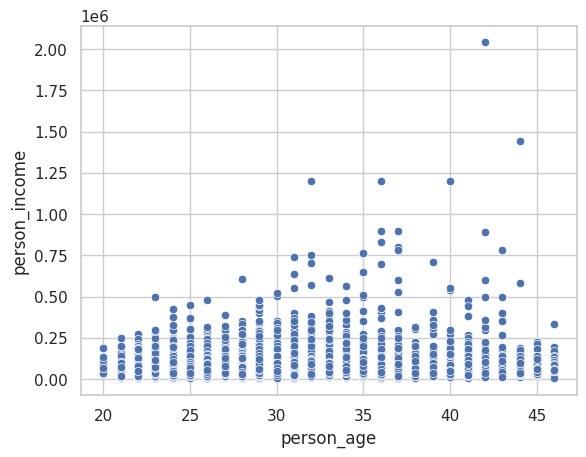

In [116]:
sns.scatterplot(x=df_filtrado['person_age'], y=df_filtrado['person_income'], data=df_filtrado)


In [117]:
valores_unicos = df_filtrado['loan_intent'].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


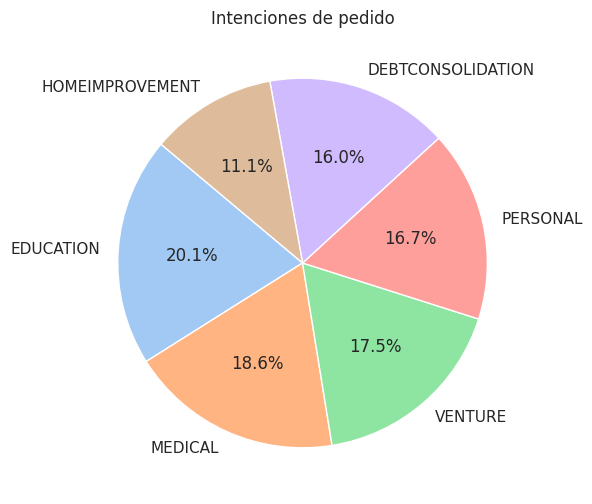

In [118]:

total_loan_intents = df_filtrado['loan_intent'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_intents))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_intents, labels=total_loan_intents.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Intenciones de pedido")
plt.show()

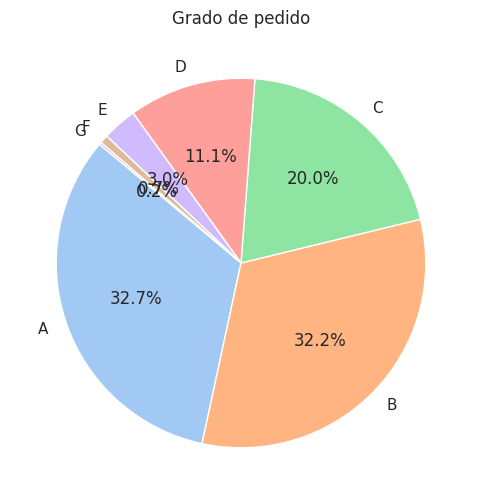

In [119]:

total_loan_grade = df_filtrado['loan_grade'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_grade))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_grade, labels=total_loan_grade.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Grado de pedido")
plt.show()

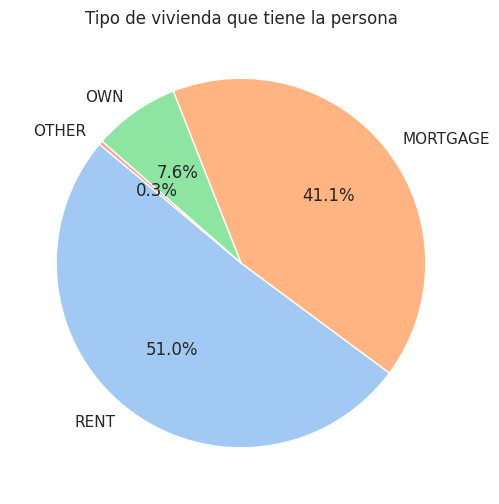

In [120]:

total_person_home_ownership = df_filtrado['person_home_ownership'].value_counts()
colores = sns.color_palette("pastel", len(total_person_home_ownership))

plt.figure(figsize=(8, 6))
plt.pie(total_person_home_ownership, labels=total_person_home_ownership.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Tipo de vivienda que tiene la persona")
plt.show()

In [121]:
print(df.to_string())

       person_age  person_income person_home_ownership  person_emp_length        loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length
0              22          59000                  RENT              123.0           PERSONAL          D      35000          16.02            1                 0.59                         Y                           3
1              21           9600                   OWN                5.0          EDUCATION          B       1000          11.14            0                 0.10                         N                           2
2              25           9600              MORTGAGE                1.0            MEDICAL          C       5500          12.87            1                 0.57                         N                           3
3              23          65500                  RENT                4.0            MEDICAL          C      35000          15.2

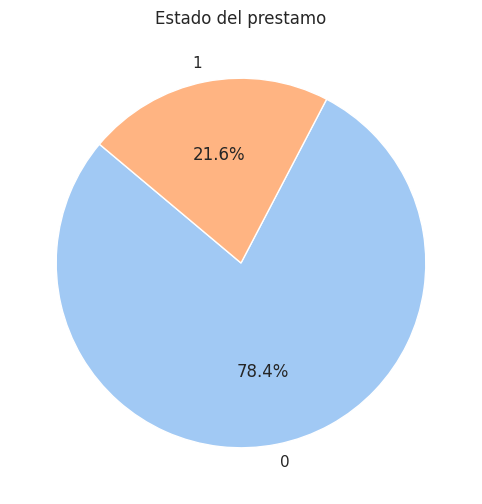

In [122]:

total_loan_status = df_filtrado['loan_status'].value_counts()
colores = sns.color_palette("pastel", len(total_loan_status))

plt.figure(figsize=(8, 6))
plt.pie(total_loan_status, labels=total_loan_status.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Estado del prestamo")
plt.show()

In [123]:
cantidad = df_filtrado['loan_status'].value_counts()
print(cantidad)

loan_status
0    24208
1     6652
Name: count, dtype: int64


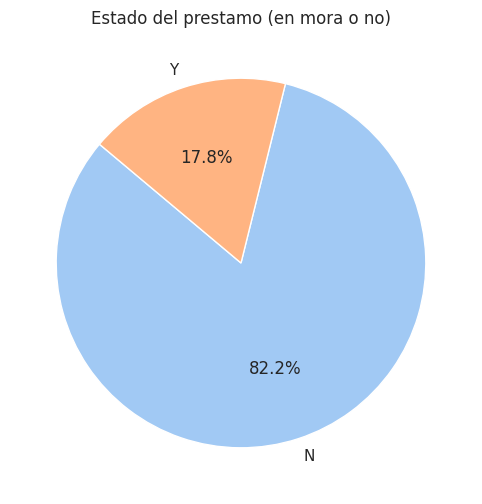

In [124]:
total_cb_person_default_on_file = df_filtrado['cb_person_default_on_file'].value_counts()
colores = sns.color_palette("pastel", len(total_cb_person_default_on_file))

plt.figure(figsize=(8, 6))
plt.pie(total_cb_person_default_on_file, labels=total_cb_person_default_on_file.index, autopct='%1.1f%%', startangle=140, colors=colores)
plt.title("Estado del prestamo (en mora o no)")
plt.show()

In [125]:
cantidad = df_filtrado['cb_person_default_on_file'].value_counts()
print(cantidad)

cb_person_default_on_file
N    25380
Y     5480
Name: count, dtype: int64


In [126]:
cantidad_total = df_filtrado[(df['loan_status'] == 1) & (df['cb_person_default_on_file'] == 'N')]
print(len(cantidad_total))


4595


/tmp/ipykernel_7615/1595719004.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cantidad_total = df_filtrado[(df['loan_status'] == 1) & (df['cb_person_default_on_file'] == 'N')]


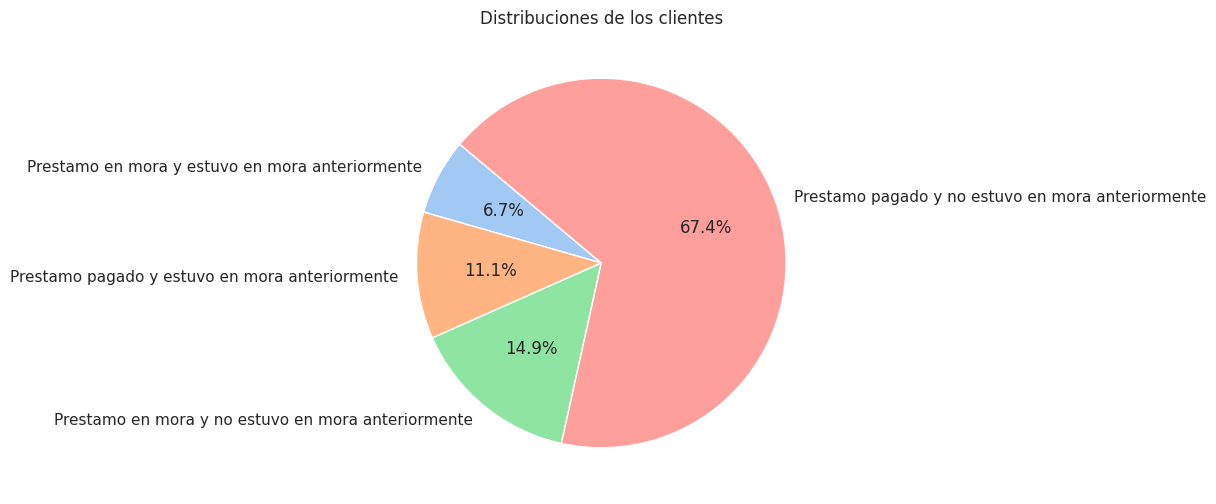

In [127]:
comb_1_Y = len(df_filtrado[(df_filtrado['loan_status'] == 1) & (df_filtrado['cb_person_default_on_file'] == 'Y')])
comb_0_Y = len(df_filtrado[(df_filtrado['loan_status'] == 0) & (df_filtrado['cb_person_default_on_file'] == 'Y')])
comb_1_N = len(df_filtrado[(df_filtrado['loan_status'] == 1) & (df_filtrado['cb_person_default_on_file'] == 'N')])
comb_0_N = len(df_filtrado[(df_filtrado['loan_status'] == 0) & (df_filtrado['cb_person_default_on_file'] == 'N')])

# Creamos una lista con los tamaños de cada sector
sizes = [comb_1_Y, comb_0_Y, comb_1_N, comb_0_N]

# Definimos las etiquetas para cada combinación
labels = [
    'Prestamo en mora y estuvo en mora anteriormente',
    'Prestamo pagado y estuvo en mora anteriormente',
    'Prestamo en mora y no estuvo en mora anteriormente',
    'Prestamo pagado y no estuvo en mora anteriormente'
]

# Creamos el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(sizes)))
plt.title("Distribuciones de los clientes")
plt.show()

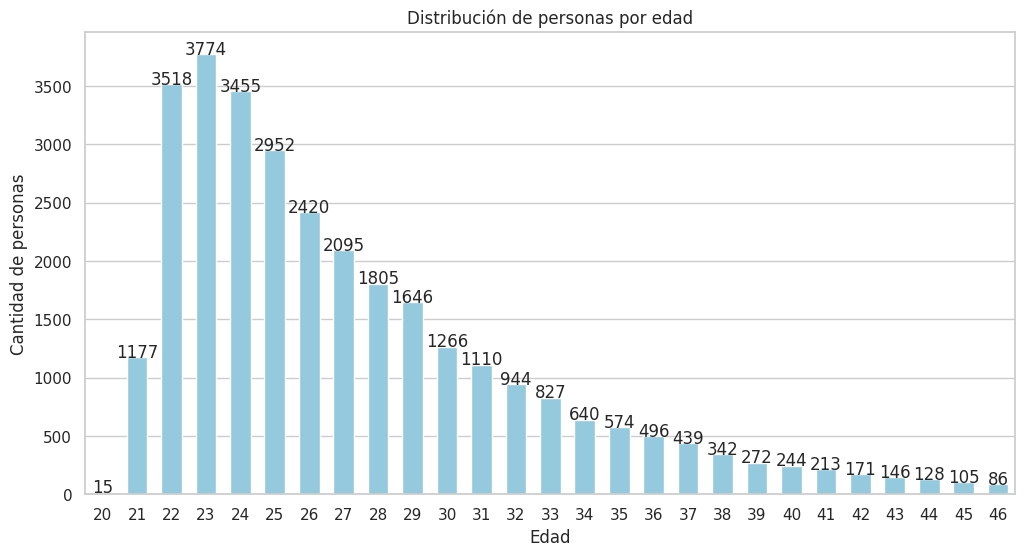

In [128]:
edad_counts = df_filtrado['person_age'].value_counts().sort_index()
sns.set(style="whitegrid")

# Creamos el gráfico de barras a partir de los conteos de edad con mayor separación
plt.figure(figsize=(12, 6))
sns.barplot(x=edad_counts.index, y=edad_counts.values, color="skyblue", width=0.6)  # width reducido para más espacio

# Añadimos etiquetas y título
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")
plt.title("Distribución de personas por edad")


# Ajustar los límites del eje x para dar más espacio
plt.xlim(-0.5, len(edad_counts) - 0.5)  # Ajusta los límites del eje x

# Añadimos etiquetas encima de cada barra para mostrar el valor
for index, value in enumerate(edad_counts.values):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')

plt.show()

In [129]:
valores_unicos = df_filtrado['loan_grade'].unique()
print("Valores únicos:", valores_unicos)

Valores únicos: ['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [130]:
df_filtrado['loan_grade'] = df_filtrado['loan_grade'].replace({'D': 0, 'B': 1, 'C': 2, 'A': 3, 'E': 4, 'F': 5, 'G': 6})
print(df['loan_grade'])

0        D
1        B
2        C
3        C
4        C
        ..
32576    C
32577    A
32578    B
32579    B
32580    B
Name: loan_grade, Length: 32581, dtype: object


/tmp/ipykernel_7615/60649067.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtrado['loan_grade'] = df_filtrado['loan_grade'].replace({'D': 0, 'B': 1, 'C': 2, 'A': 3, 'E': 4, 'F': 5, 'G': 6})


In [131]:
print(df.isnull().any())

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool


<Axes: xlabel='person_income', ylabel='loan_percent_income'>

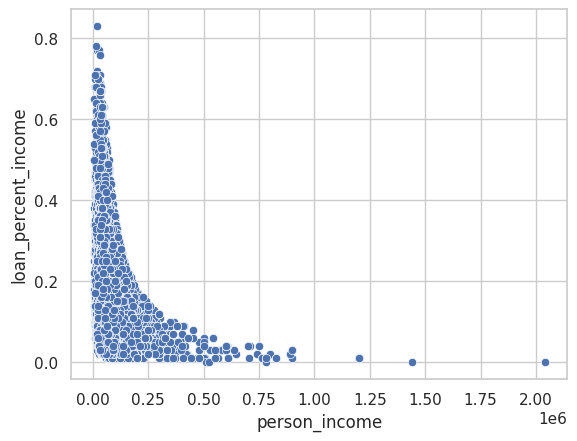

In [132]:
sns.scatterplot(x=df_filtrado['person_income'], y=df_filtrado['loan_percent_income'], data=df_filtrado)


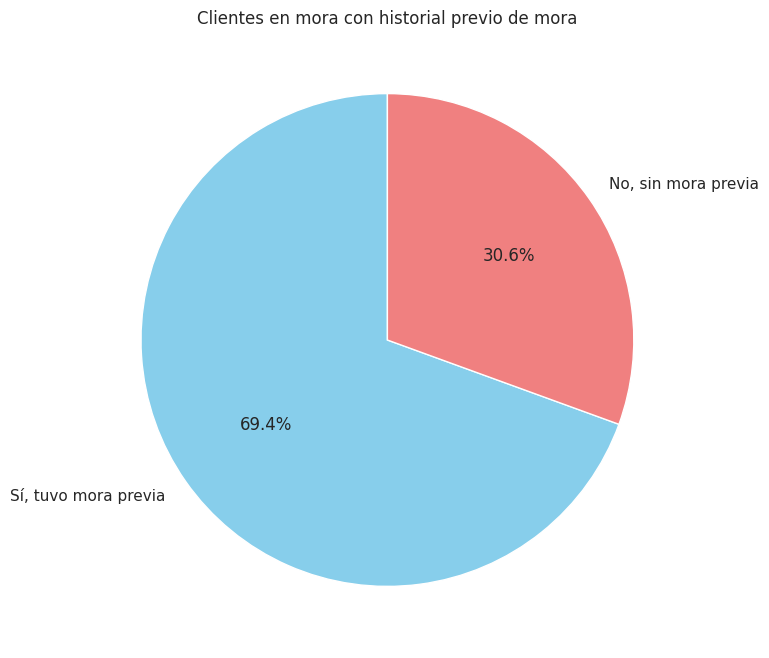

FileNotFoundError: [Errno 2] No such file or directory: 'ruta_del_dataset.csv'

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

df
# Cargar el DataFrame (ajusta la ruta si es necesario)
df = pd.read_csv('credit_risk_dataset.csv')
# Filtrar los clientes que están actualmente en mora (loan_status = 1)
clientes_en_mora = df[df['loan_status'] == 1]

# Contar cuántos de ellos tienen historial previo de mora (cb_person_default_on_file = 1)
mora_previa = clientes_en_mora['cb_person_default_on_file'].value_counts()

# Renombrar índices para mayor claridad
mora_previa.index = ['Sí, tuvo mora previa', 'No, sin mora previa']

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(mora_previa, labels=mora_previa.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Clientes en mora con historial previo de mora')
plt.show()

# Cargar el DataFrame (ajusta la ruta si es necesario)
df = pd.read_csv('ruta_del_dataset.csv')

# Filtrar los clientes que están actualmente en mora (loan_status = 1)
clientes_en_mora = df[df['loan_status'] == 1]

# Contar cuántos de ellos tienen historial previo de mora (cb_person_default_on_file = 1)
mora_previa = clientes_en_mora['cb_person_default_on_file'].value_counts()

# Renombrar índices para mayor claridad
mora_previa.index = ['Sí, tuvo mora previa', 'No, sin mora previa']

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(mora_previa, labels=mora_previa.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Clientes en mora con historial previo de mora')
plt.show()


/tmp/ipykernel_59597/825083448.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_grade_interest, x='loan_grade', y='loan_int_rate', palette='viridis')


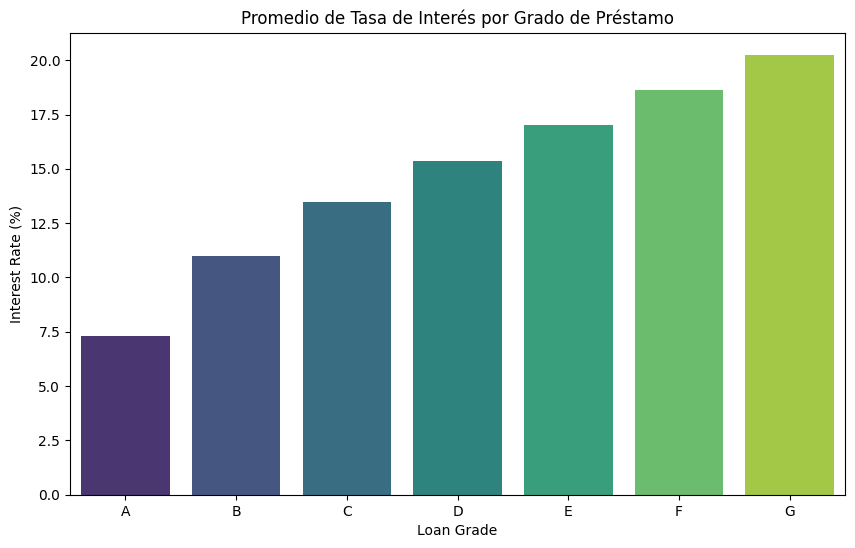

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que los datos están en un archivo CSV llamado 'data.csv'
# data = pd.read_csv('data.csv')
data=df
# Vamos a agrupar por `loan_grade` y calcular la tasa de interés promedio (`loan_int_rate`)
loan_grade_interest = data.groupby('loan_grade')['loan_int_rate'].mean().reset_index()

# Visualizamos la relación con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=loan_grade_interest, x='loan_grade', y='loan_int_rate', palette='viridis')
plt.title('Promedio de Tasa de Interés por Grado de Préstamo')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()


Accuracy: 0.886604265766457
Confusion Matrix:
[[4962  110]
 [ 629  816]]


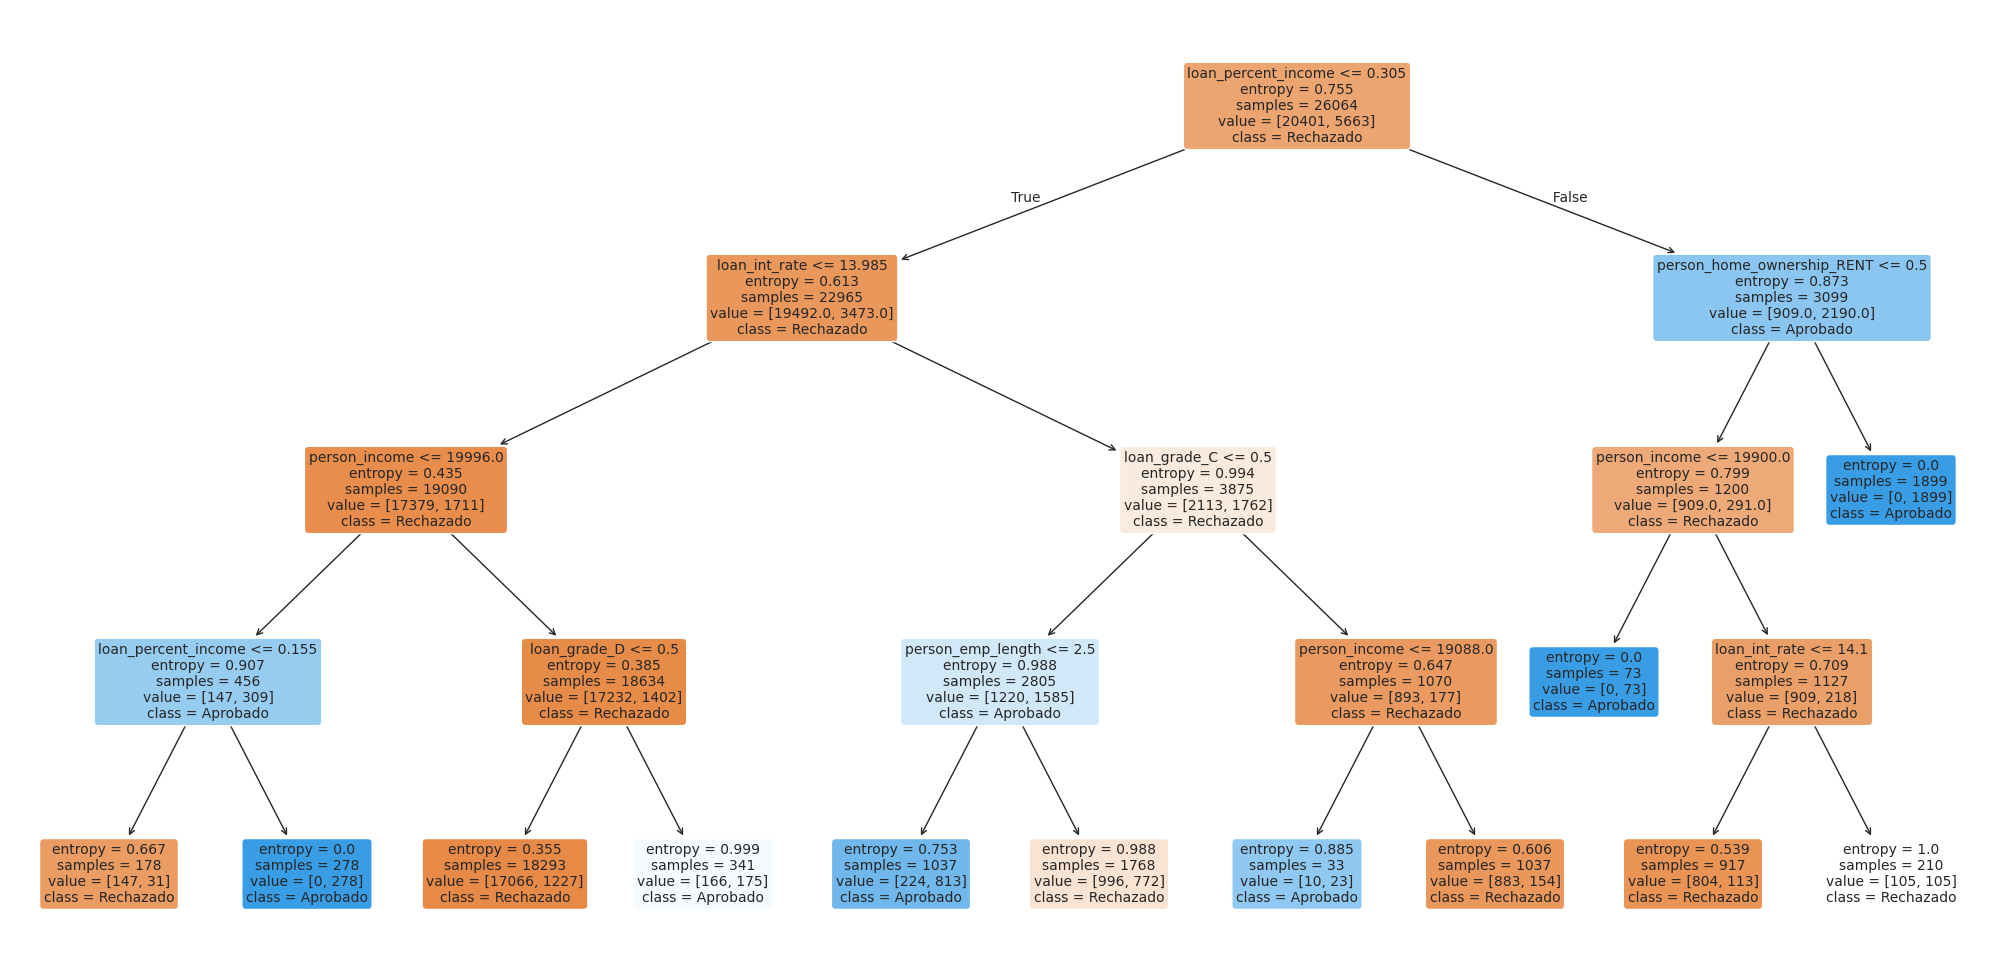

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo CSV
data = pd.read_csv('credit_risk_dataset.csv')

# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, drop_first=True)

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión con una profundidad máxima de 4 y criterio 'entropy'
model = DecisionTreeClassifier(random_state=42, max_depth=4, criterion='entropy')

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualizar el árbol de decisión con ajustes para mejor separación
plt.figure(figsize=(22, 12))  # Ajustar tamaño de la figura para mejor separación
tree.plot_tree(
    model, 
    feature_names=X.columns, 
    class_names=['Rechazado', 'Aprobado'], 
    filled=True, 
    fontsize=10, 
    proportion=False,  # Mantener proporciones consistentes
    rounded=True  # Bordes redondeados
)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95, hspace=0.3)  # Ajuste del espaciado
plt.show()


In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convertir variables categóricas en variables dummy
df_filtrado = pd.get_dummies(df_filtrado, drop_first=True)

# Definir las características (X) y la variable objetivo (y)
X = df_filtrado.drop('loan_status', axis=1)
y = df_filtrado['loan_status']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Mostrar el informe de clasificación
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     12017
           1       0.96      0.71      0.81      3413

    accuracy                           0.93     15430
   macro avg       0.94      0.85      0.88     15430
weighted avg       0.93      0.93      0.92     15430



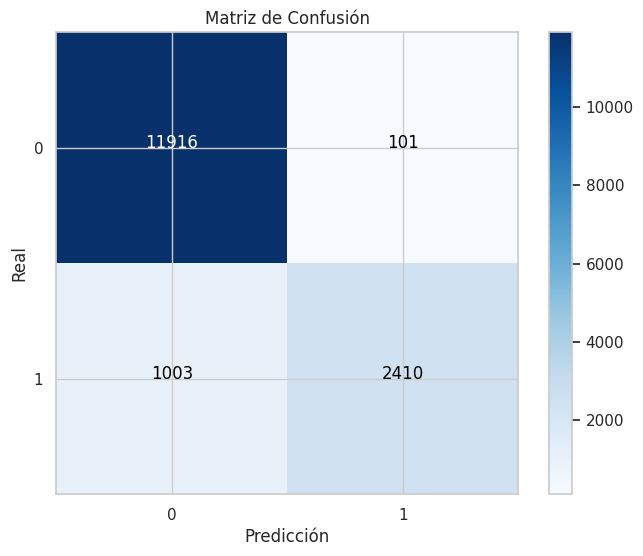

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

classes = ['0', '1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicción')
plt.ylabel('Real')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()
